<a id=0></a>
# 6.Matrix Plot & Display Settings

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.Numpyのwhere(), select()を用いたレコード抽出と置換](#2)
### [3.Matrix Plot ](#3)
### [4.パイチャートと画像の保存](#4)
### [5.グラフの表示調整](#5)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット('iris')を読み込む
* PandasのCategory型
---

データセット('iris')を読み込む

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<p>
    <a href="https://www.kaggle.com/datasets/uciml/iris" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Iris のページへ
    </a>
</p>

    sepal     : がく片
    petal     : 花弁

PandasのCategory型

In [12]:
df.shape

(150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
# df['species'] = df['species'].astype('category')
# df.info()

In [15]:
pd.Categorical(df['species'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [17]:
df['cat'] = pd.Categorical(df['species'], ordered=True, categories=['versicolor', 'virginica', 'setosa'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cat
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [18]:
df['cat'].cat.categories

Index(['versicolor', 'virginica', 'setosa'], dtype='object')

In [19]:
df['cat'].cat.codes

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int8

In [20]:
df.drop('cat', axis=1, inplace=True)

---
<a id=2></a>
[Topへ](#0)

---
## 2. Numpyのwhere(), select()を用いたレコード抽出と置換

* np.where(condition, True-value, False-value)
* np.select(conditions, values)  
---

np.where(condition, True-value, False-value)

In [21]:
np.where(df['petal_width'] > 1.3)

(array([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,
         75,  76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]),)

In [23]:
df[df['petal_width'] > 1.3].index

Index([ 50,  51,  52,  54,  56,  59,  61,  63,  65,  66,  68,  70,  72,  75,
        76,  77,  78,  83,  84,  85,  86,  91, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149],
      dtype='int64')

In [24]:
np.where(df['petal_width'] > 1.3, 'wide', 'narrow')

array(['narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'wide', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'narrow', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'wide', 'narrow', 'wide',
       'narrow', 'wide', 'narrow', 'wide', 'narrow', 'narrow', 'wide',
       'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow', 'narrow',
       'wide', 'wide', 'wide', 'wide', 'narrow', 'narrow', 'narrow',
       'narrow', 'wide', 'narrow', 'narrow',

In [28]:
# li = []
# for i in df.index:
# 	if df.loc[i, 'petal_width'] > 1.3:
# 		li.append('wide')
# 	else:
# 		li.append('narrow')

# li
# ['wide' if df.loc[i, 'petal_width'] > 1.3 else 'narrow' for i in df.index]

np.select(conditions, values)

In [29]:
conditions = [df['petal_width']<1, (1<=df['sepal_width'])&(df['petal_width']<2), 2 <= df['petal_width']]
values = ['narrow', 'medium', 'wide']

In [30]:
np.select(conditions, values)

array(['narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medi

In [31]:
df['p_w_cat'] = np.select(conditions, values)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,p_w_cat
0,5.1,3.5,1.4,0.2,setosa,narrow
1,4.9,3.0,1.4,0.2,setosa,narrow
2,4.7,3.2,1.3,0.2,setosa,narrow
3,4.6,3.1,1.5,0.2,setosa,narrow
4,5.0,3.6,1.4,0.2,setosa,narrow


In [32]:
# 後のプロットで使うため、ランダムな分類を設定しておく
np.random.seed(17)
arr = ['red', 'green', 'blue']
df['color'] = np.random.choice(arr, len(df))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,p_w_cat,color
0,5.1,3.5,1.4,0.2,setosa,narrow,green
1,4.9,3.0,1.4,0.2,setosa,narrow,blue
2,4.7,3.2,1.3,0.2,setosa,narrow,blue
3,4.6,3.1,1.5,0.2,setosa,narrow,green
4,5.0,3.6,1.4,0.2,setosa,narrow,red


---
<a id=3></a>
[Topへ](#0)

---
## 3. Matrix Plot

* Seabornテーマの設定
* ヒートマップ : 相関関係を表示
    * **sns.heatmap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.heatmap のページへ
        </a>
    </p>
    

* クラスターマップ : ヒートマップを類似性の高い組み合わせに並び変えて表示
    * **sns.clustermap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.clustermap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.clustermap のページへ
        </a>
    </p>


* ペアグリッド : 自由度の高いペアプロット
    * **sns.PairGrid()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.PairGrid.html?highlight=pairgrid#seaborn.PairGrid" target="_blank" rel="noreferrer noopener">
            Seaborn.pairgrid のページへ
        </a>
    </p>


* Facetグリッド : 自由度の高い、行と列にクラス分けができるグリッド
    * **sns.FacetGrid()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid" target="_blank" rel="noreferrer noopener">
            Seaborn.facetgrid のページへ
        </a>
    </p>

---

Seabornテーマの設定

In [33]:
sns.set_theme(context='talk', style='darkgrid')

In [34]:
import japanize_matplotlib

ヒートマップ

In [35]:
df_corr = df.corr(numeric_only=True)
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


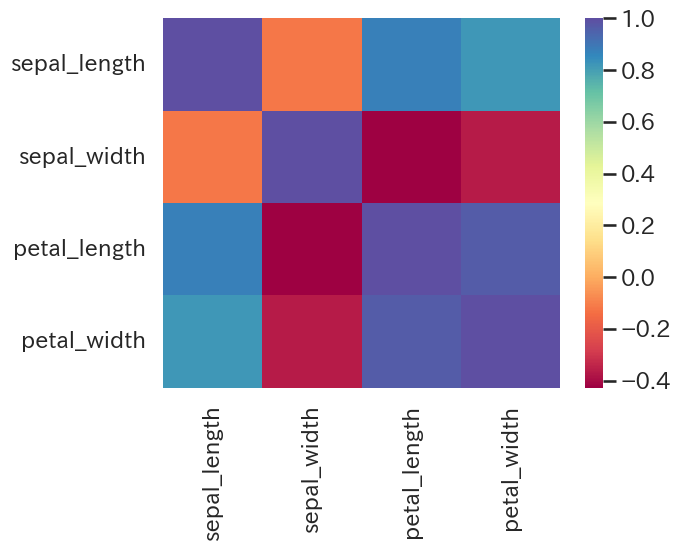

In [37]:
sns.heatmap(data=df_corr, cmap='Spectral')
plt.show()

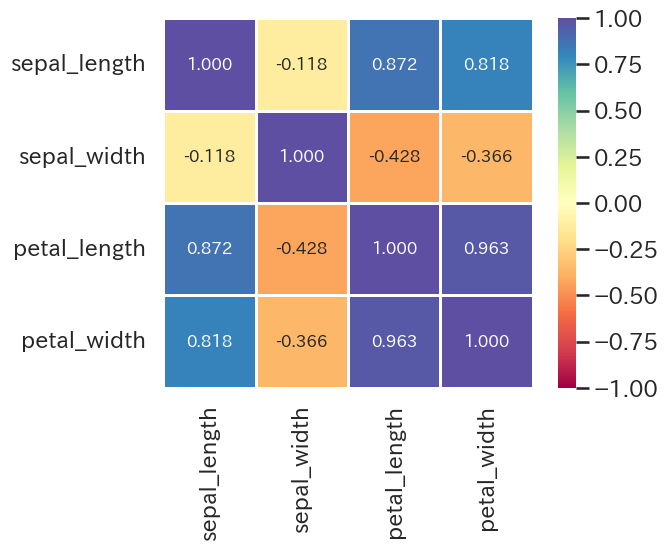

In [43]:
sns.heatmap(data=df_corr, cmap='Spectral', annot=True, vmax=1, vmin=-1, center=0, fmt='.3f', square=True, linewidths=1, annot_kws={'size': 12})
plt.show()

クラスターマップ  
※ 属性が似た

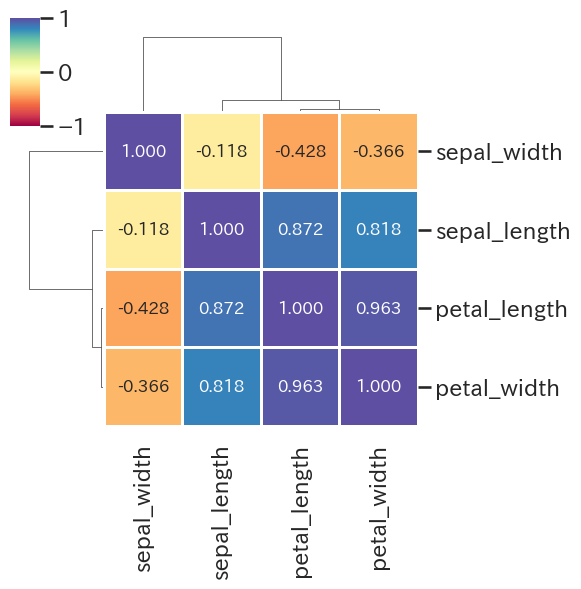

In [45]:
sns.clustermap(data=df_corr, cmap='Spectral', annot=True, vmax=1, vmin=-1, center=0, fmt='.3f', linewidths=1, annot_kws={'size': 12}, figsize=(6, 6))
plt.show()

ペアグリッド  
※ グリッド形式で2値の組み合わせ毎の関係を表す

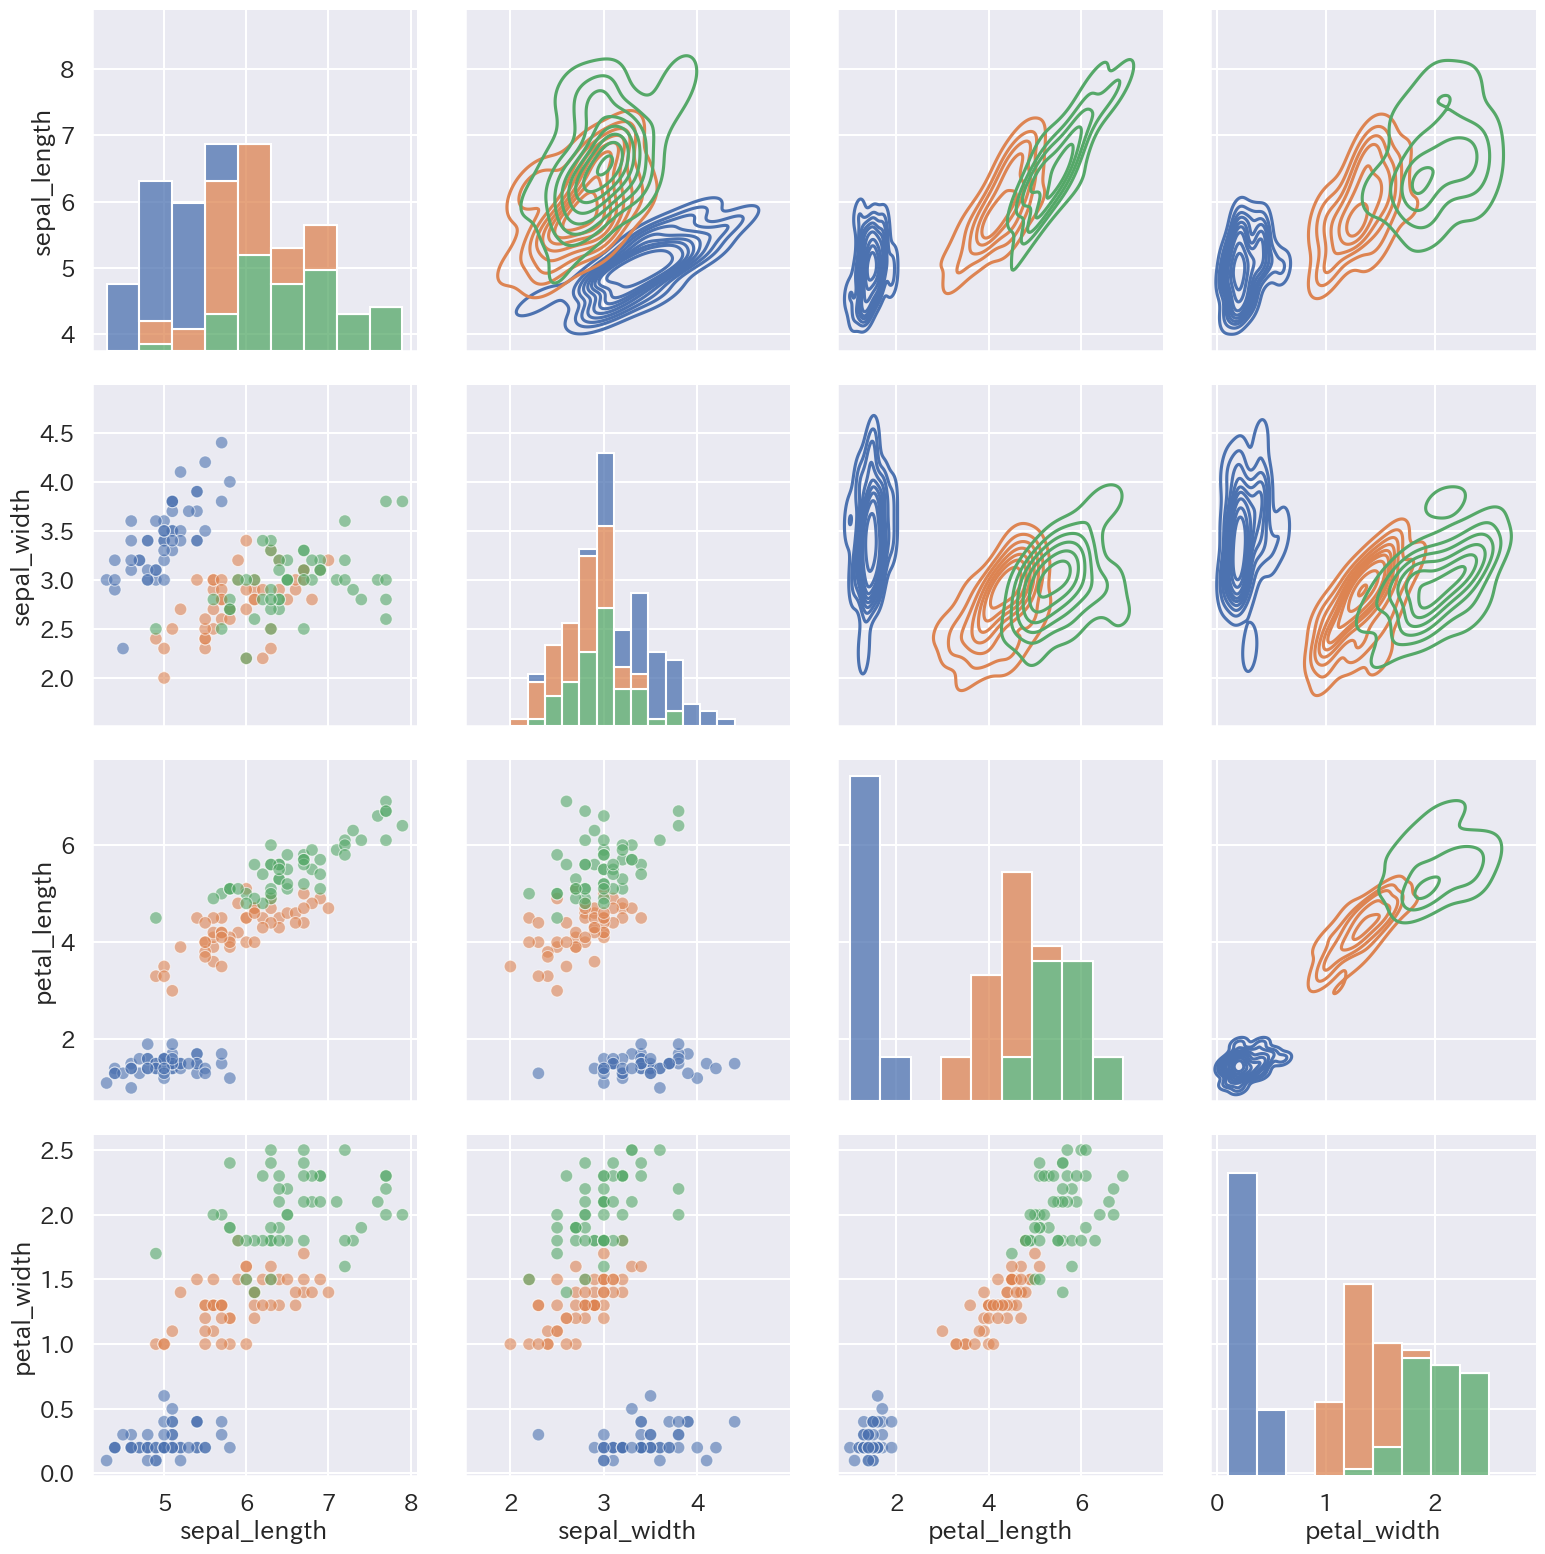

In [48]:
g = sns.PairGrid(data=df, hue='species', vars=df.select_dtypes(float).columns, height=4)
g.map_diag(sns.histplot, multiple='stack')
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot, alpha=0.6)
plt.show()

Facetグリッド  
※ row と col にクラスで分類しそれぞれにプロット

---
<a id=4></a>
[Topへ](#0)

---
## 4. パイチャートと画像の保存

In [50]:
data = df['species'].value_counts()
labels = df['species'].value_counts().index
labels

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

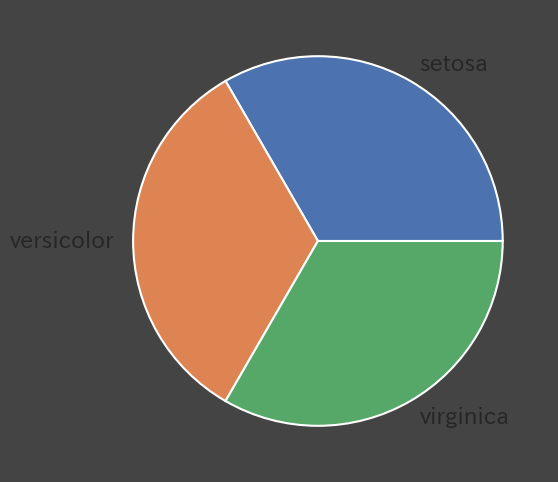

In [52]:
plt.figure(figsize=(8, 6), facecolor='#444')
plt.pie(data, labels=labels);

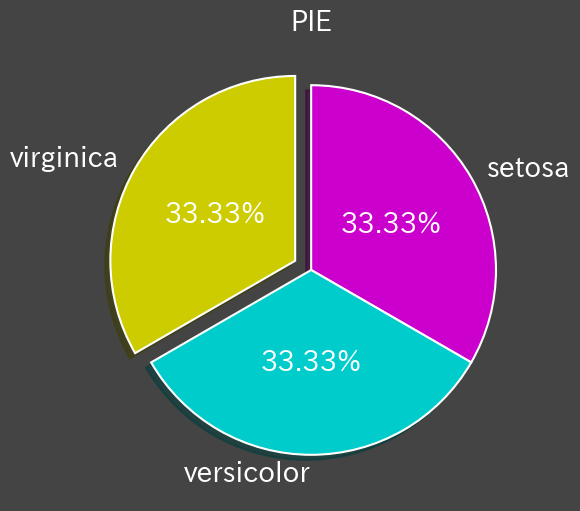

In [71]:
plt.figure(figsize=(8, 6), facecolor='#444')
plt.pie(data, labels=labels, autopct='%.2f%%', textprops={'color':'#fff', 'size':20}, colors=['#c0c', '#0cc', '#cc0'], startangle=90, counterclock=False, explode=[0, 0, 0.1], shadow=True, pctdistance=0.5)
plt.title('PIE', size=20, color='white')
plt.savefig('pie.png', dpi=100);

画像の保存

---
<a id=5></a>
[Topへ](#0)

---
## 5. グラフの表示調整

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---